# Phase 2: Exploratory Analysis via Scatterplot Matrices

**Goal:** To visually inspect the relationships in our feature-engineered datasets. For each of the five crops, we will generate two key scatterplot matrices:
1.  **Summary Stressors Matrix:** To compare the high-level impact of temperature, precipitation, soil water, and solar radiation.
2.  **Monthly Temperature Matrix:** To identify if a specific month's temperature is a stronger predictor than the seasonal average.

--- Generating Scatterplot Matrices for All Crops ---

==================== Processing: MAIZE ====================

Generating Summary Stressors Matrix...


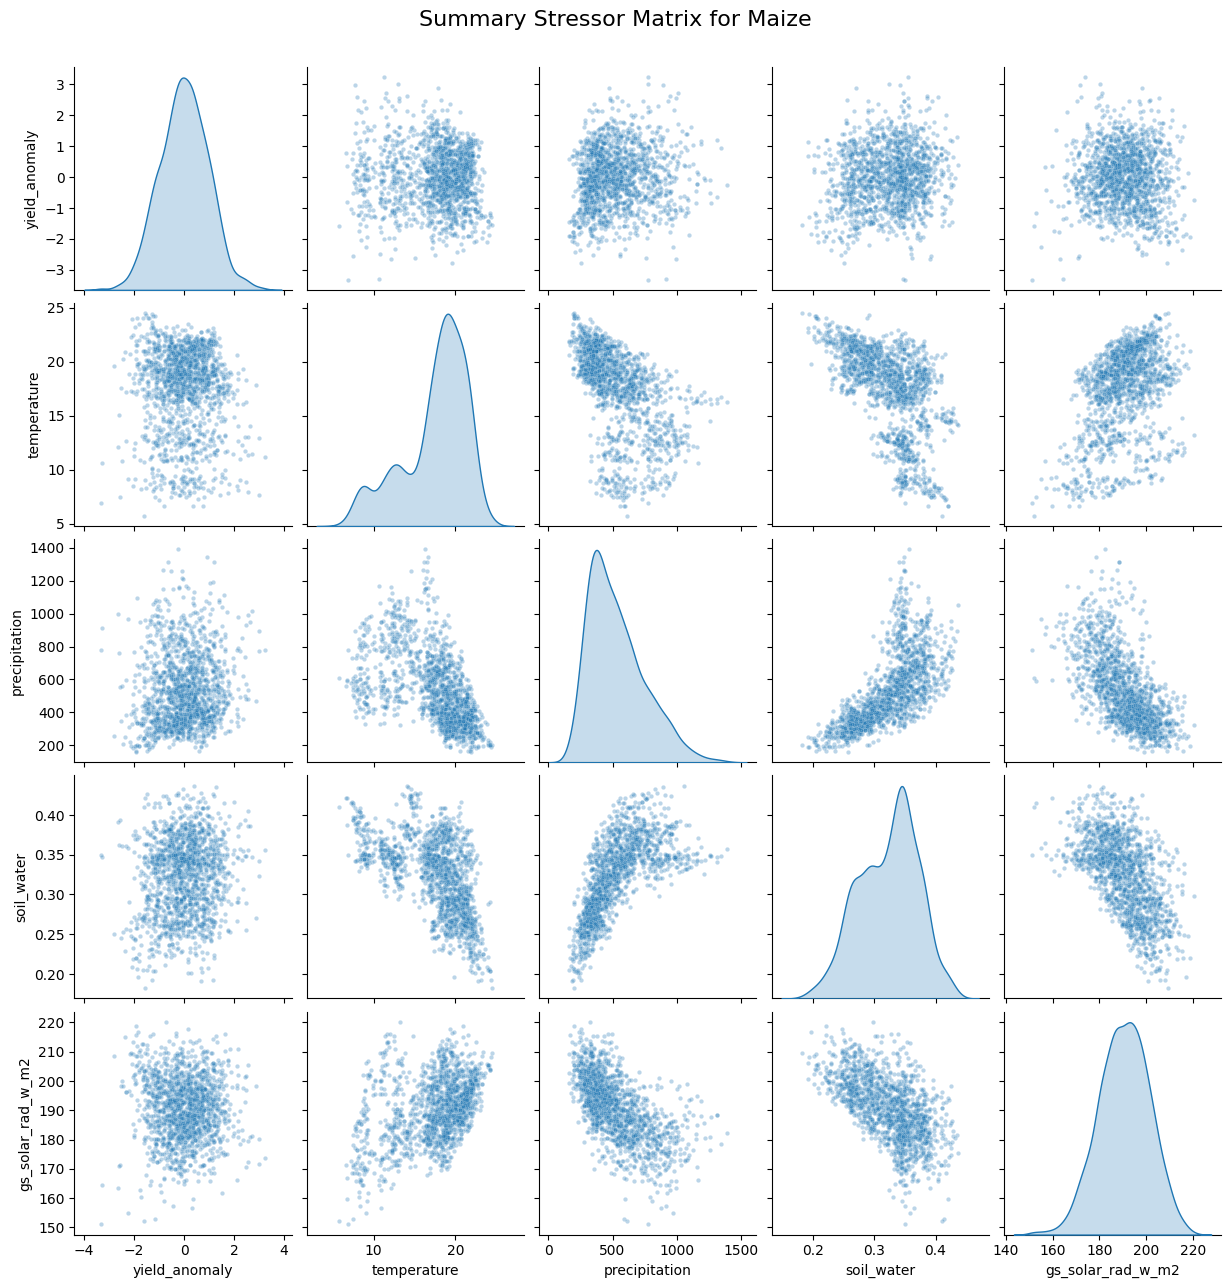


Generating Monthly Temperature Matrix...


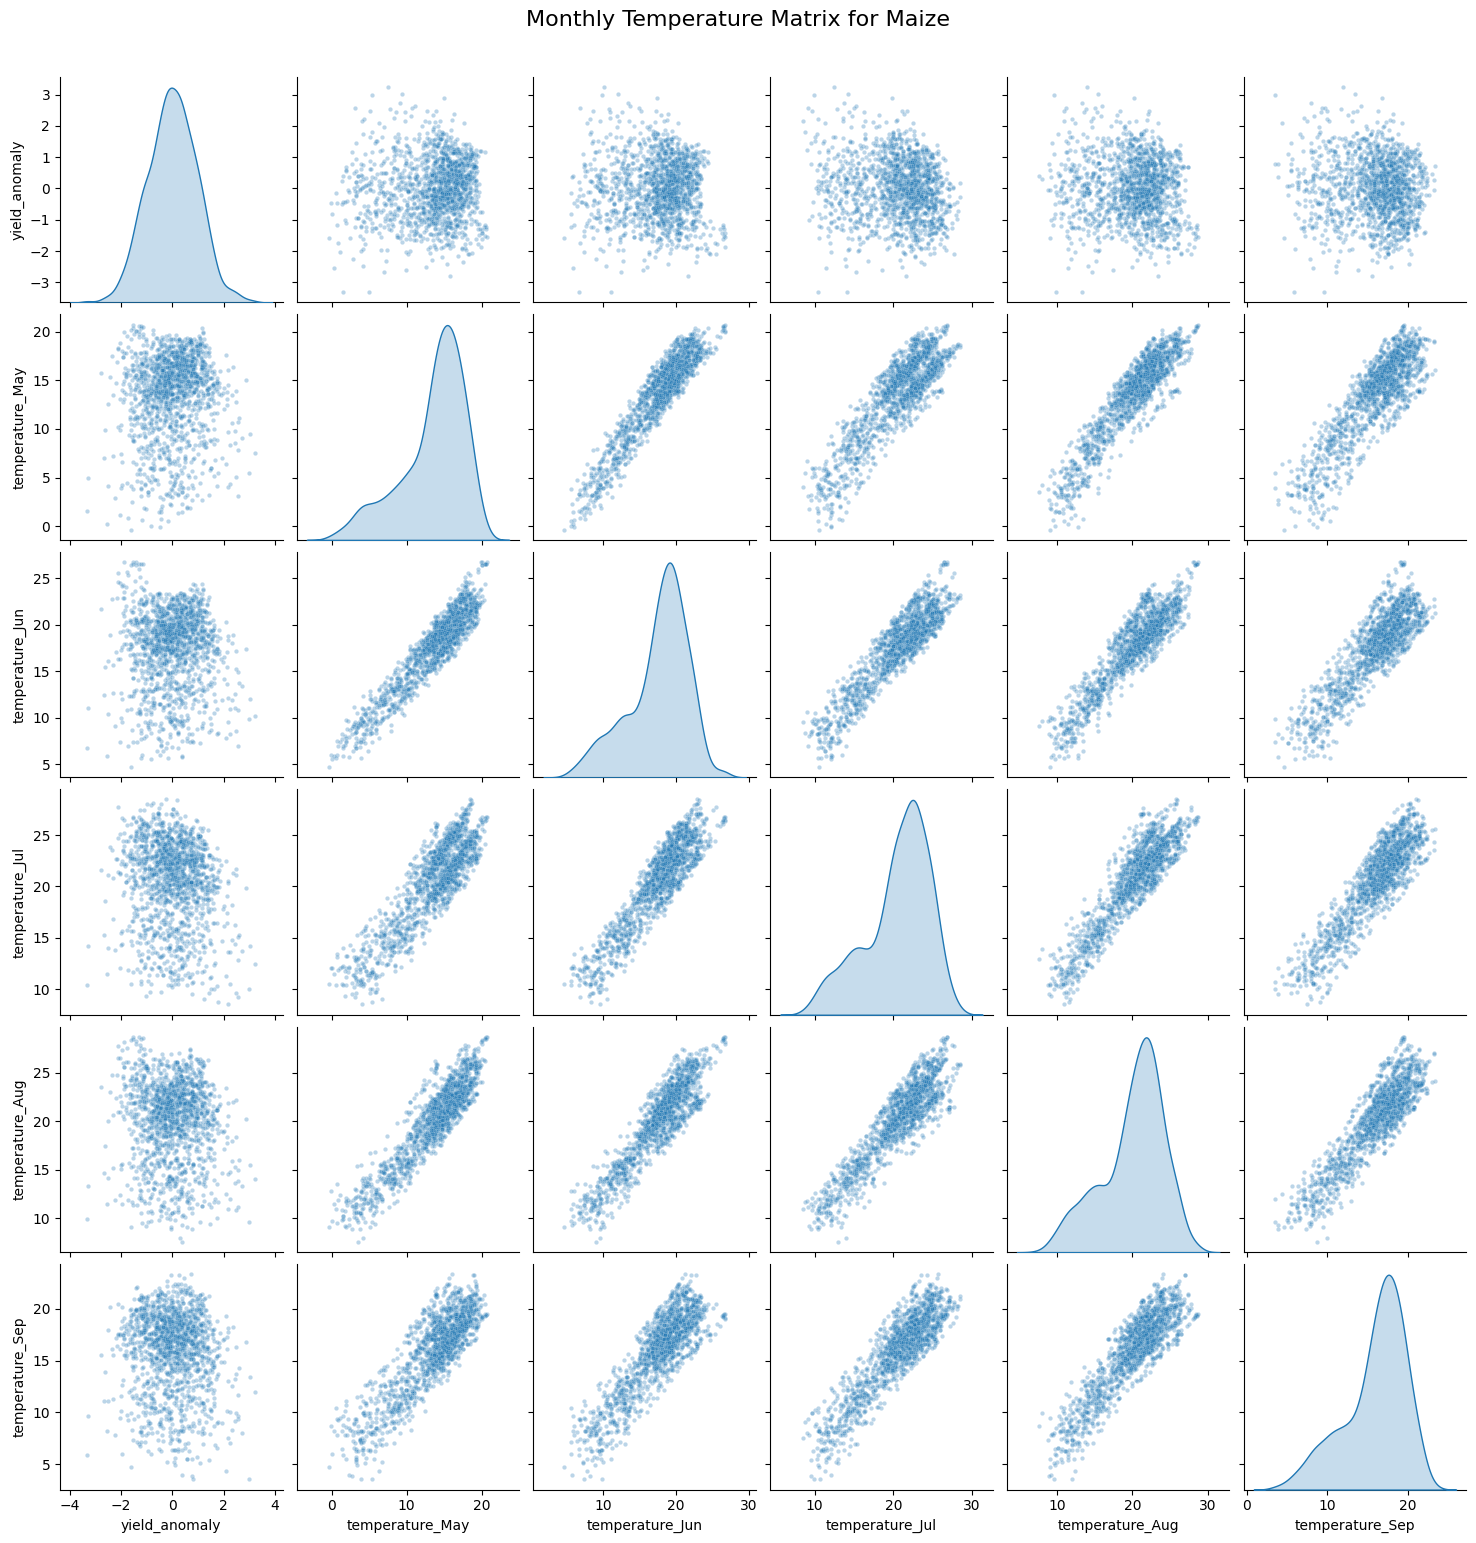


==================== Processing: RICE ====================

Generating Summary Stressors Matrix...


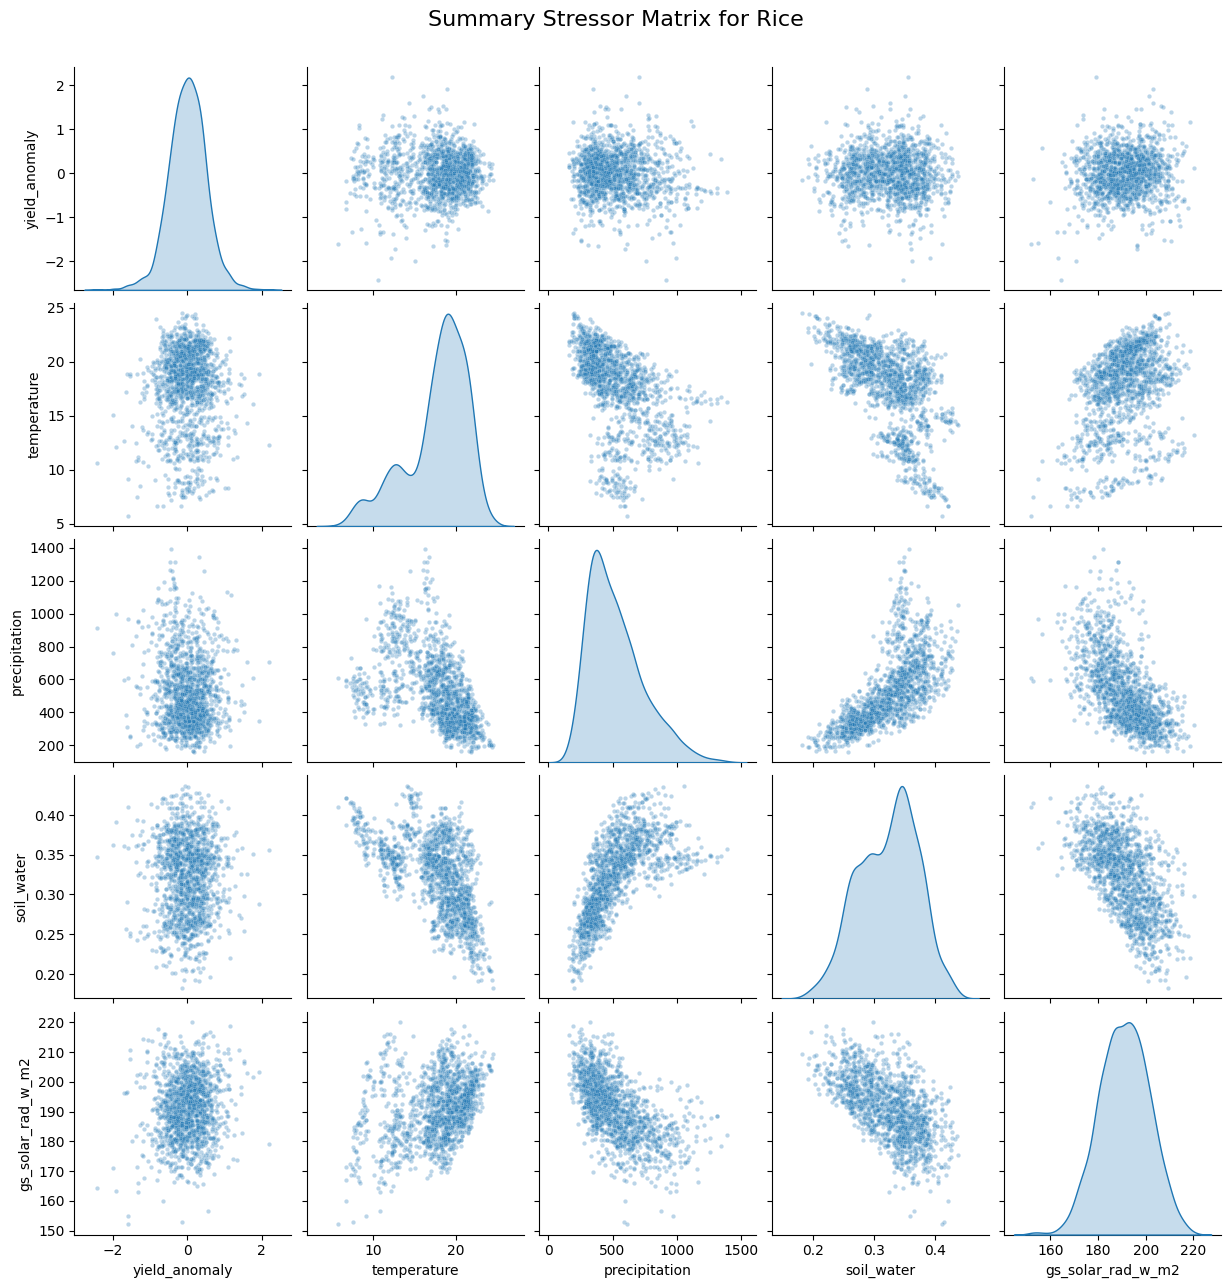


Generating Monthly Temperature Matrix...


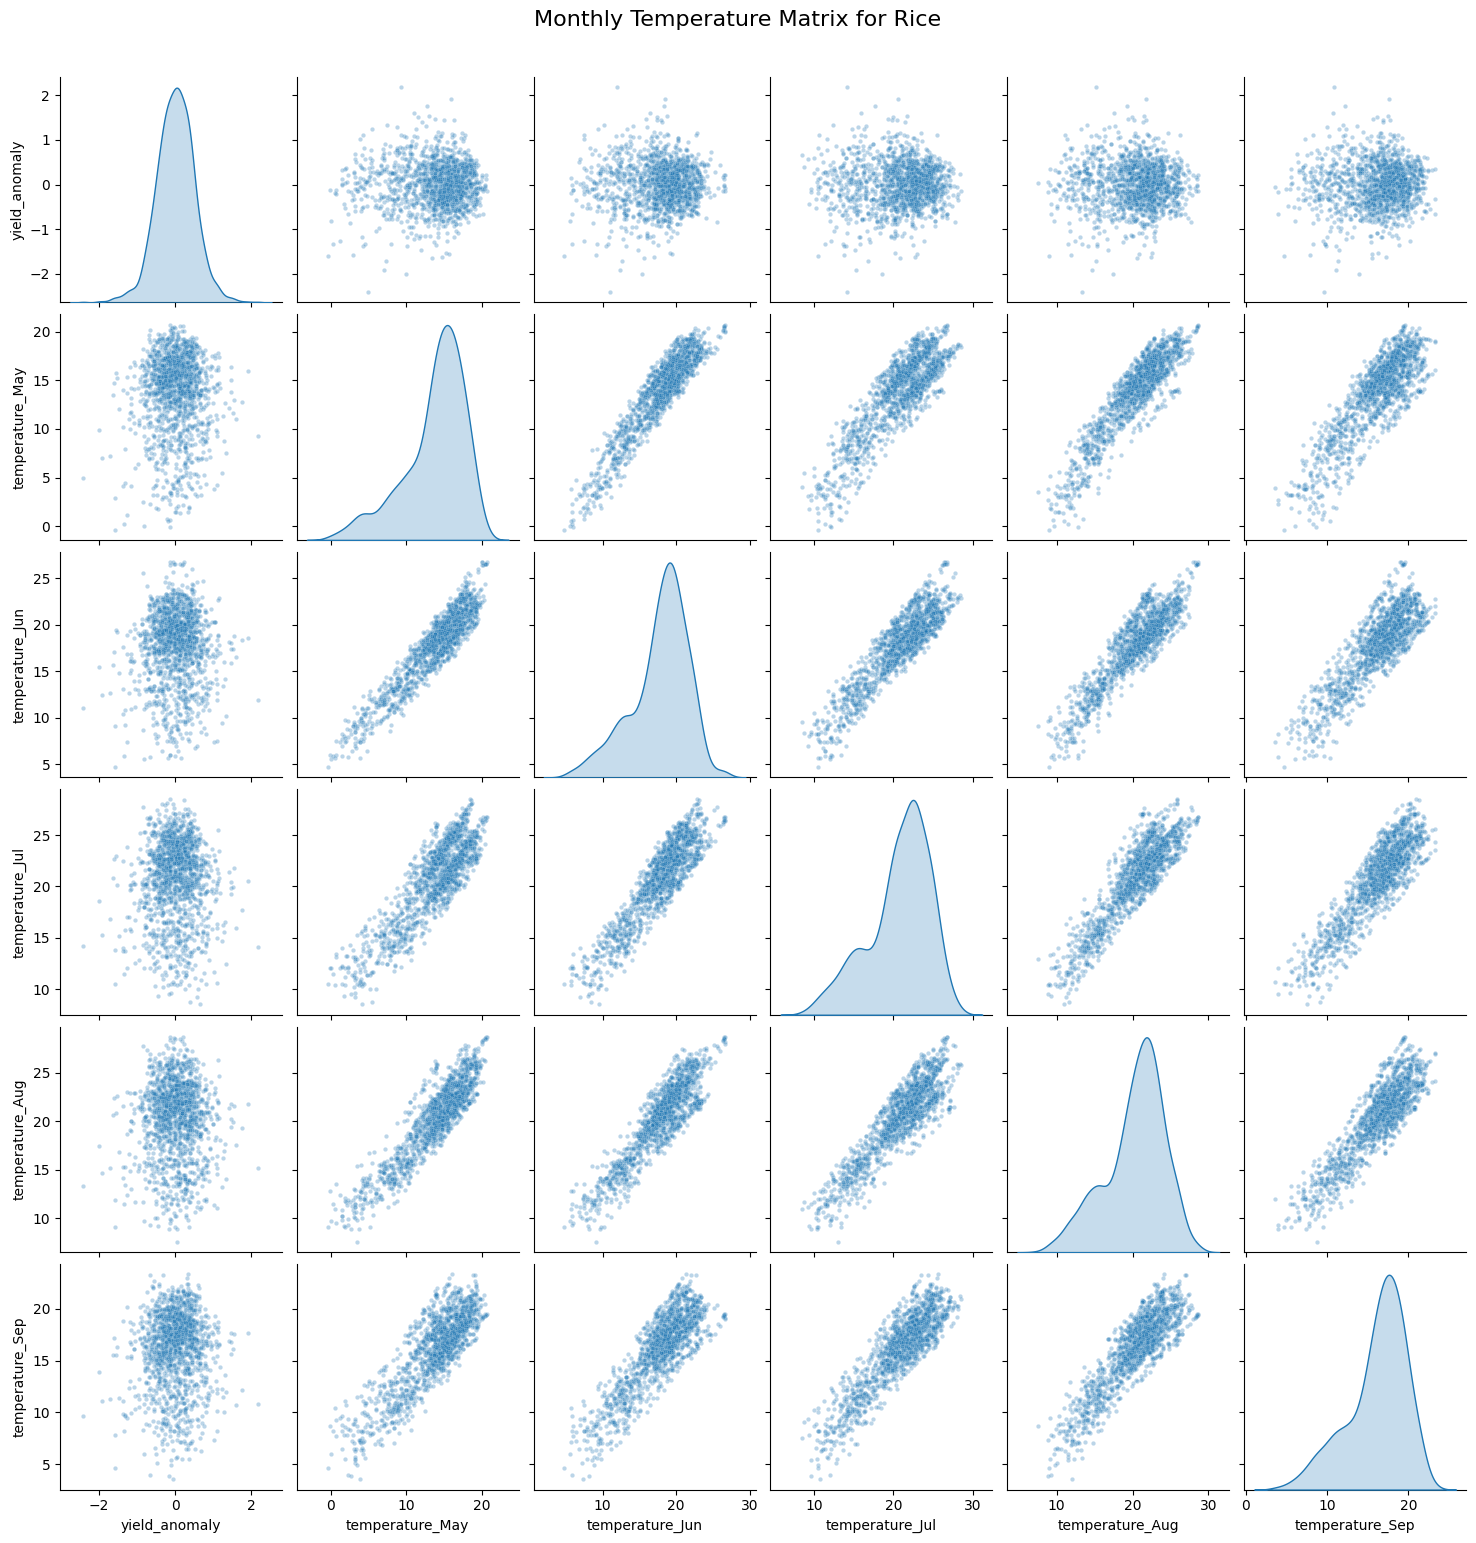


==================== Processing: SOYBEAN ====================

Generating Summary Stressors Matrix...


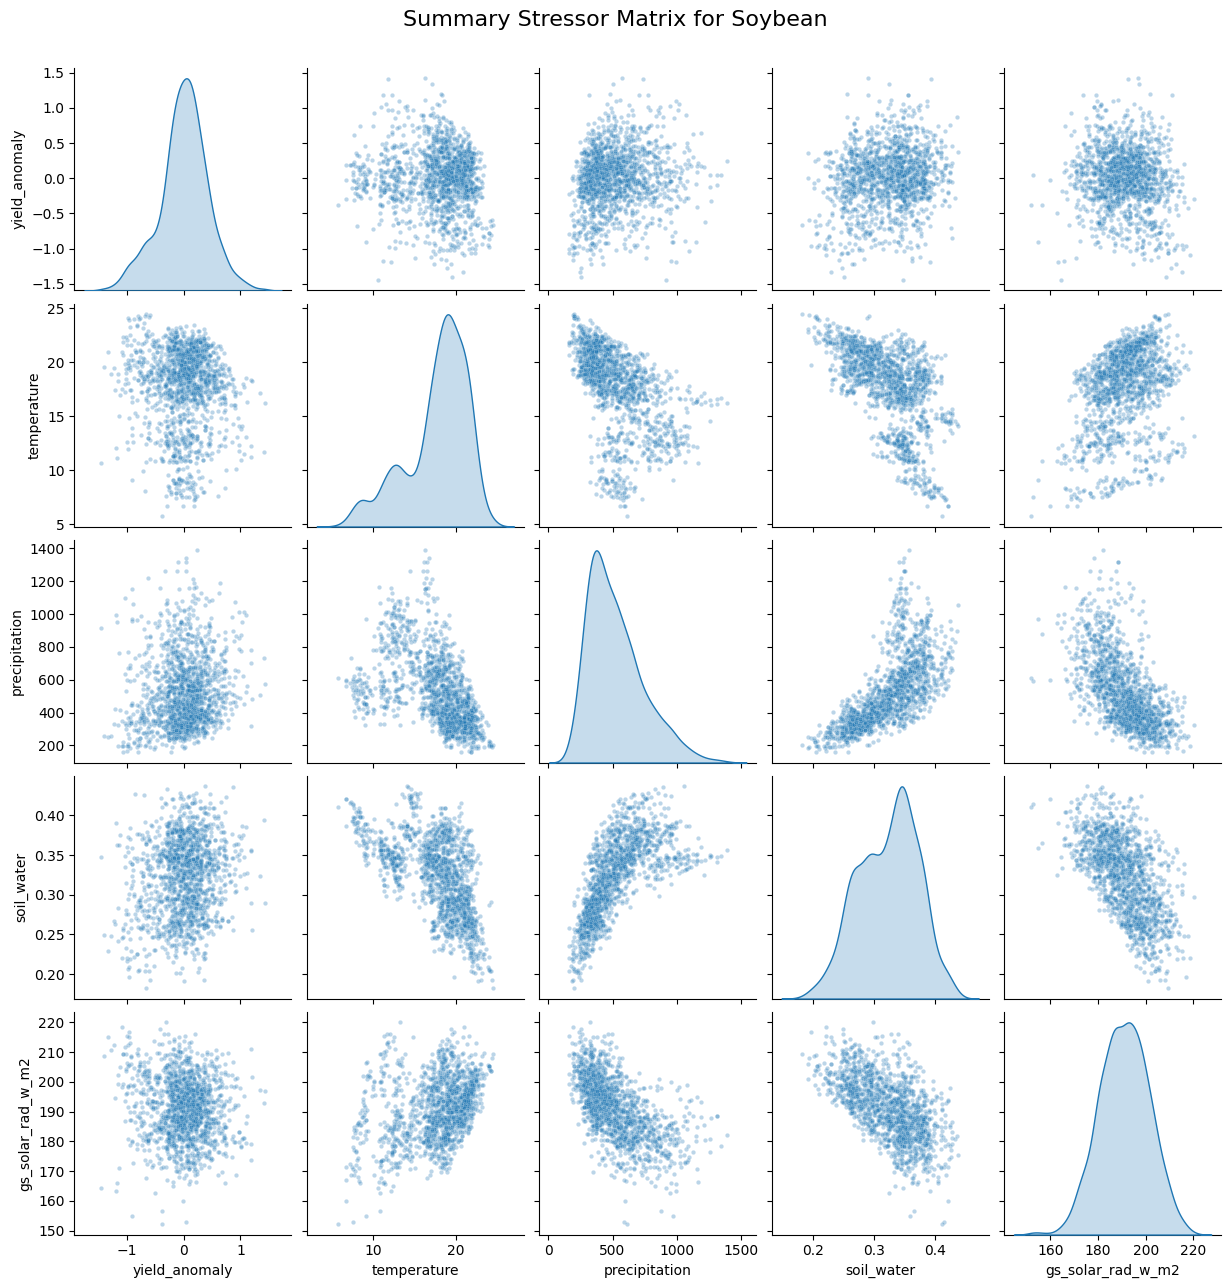


Generating Monthly Temperature Matrix...


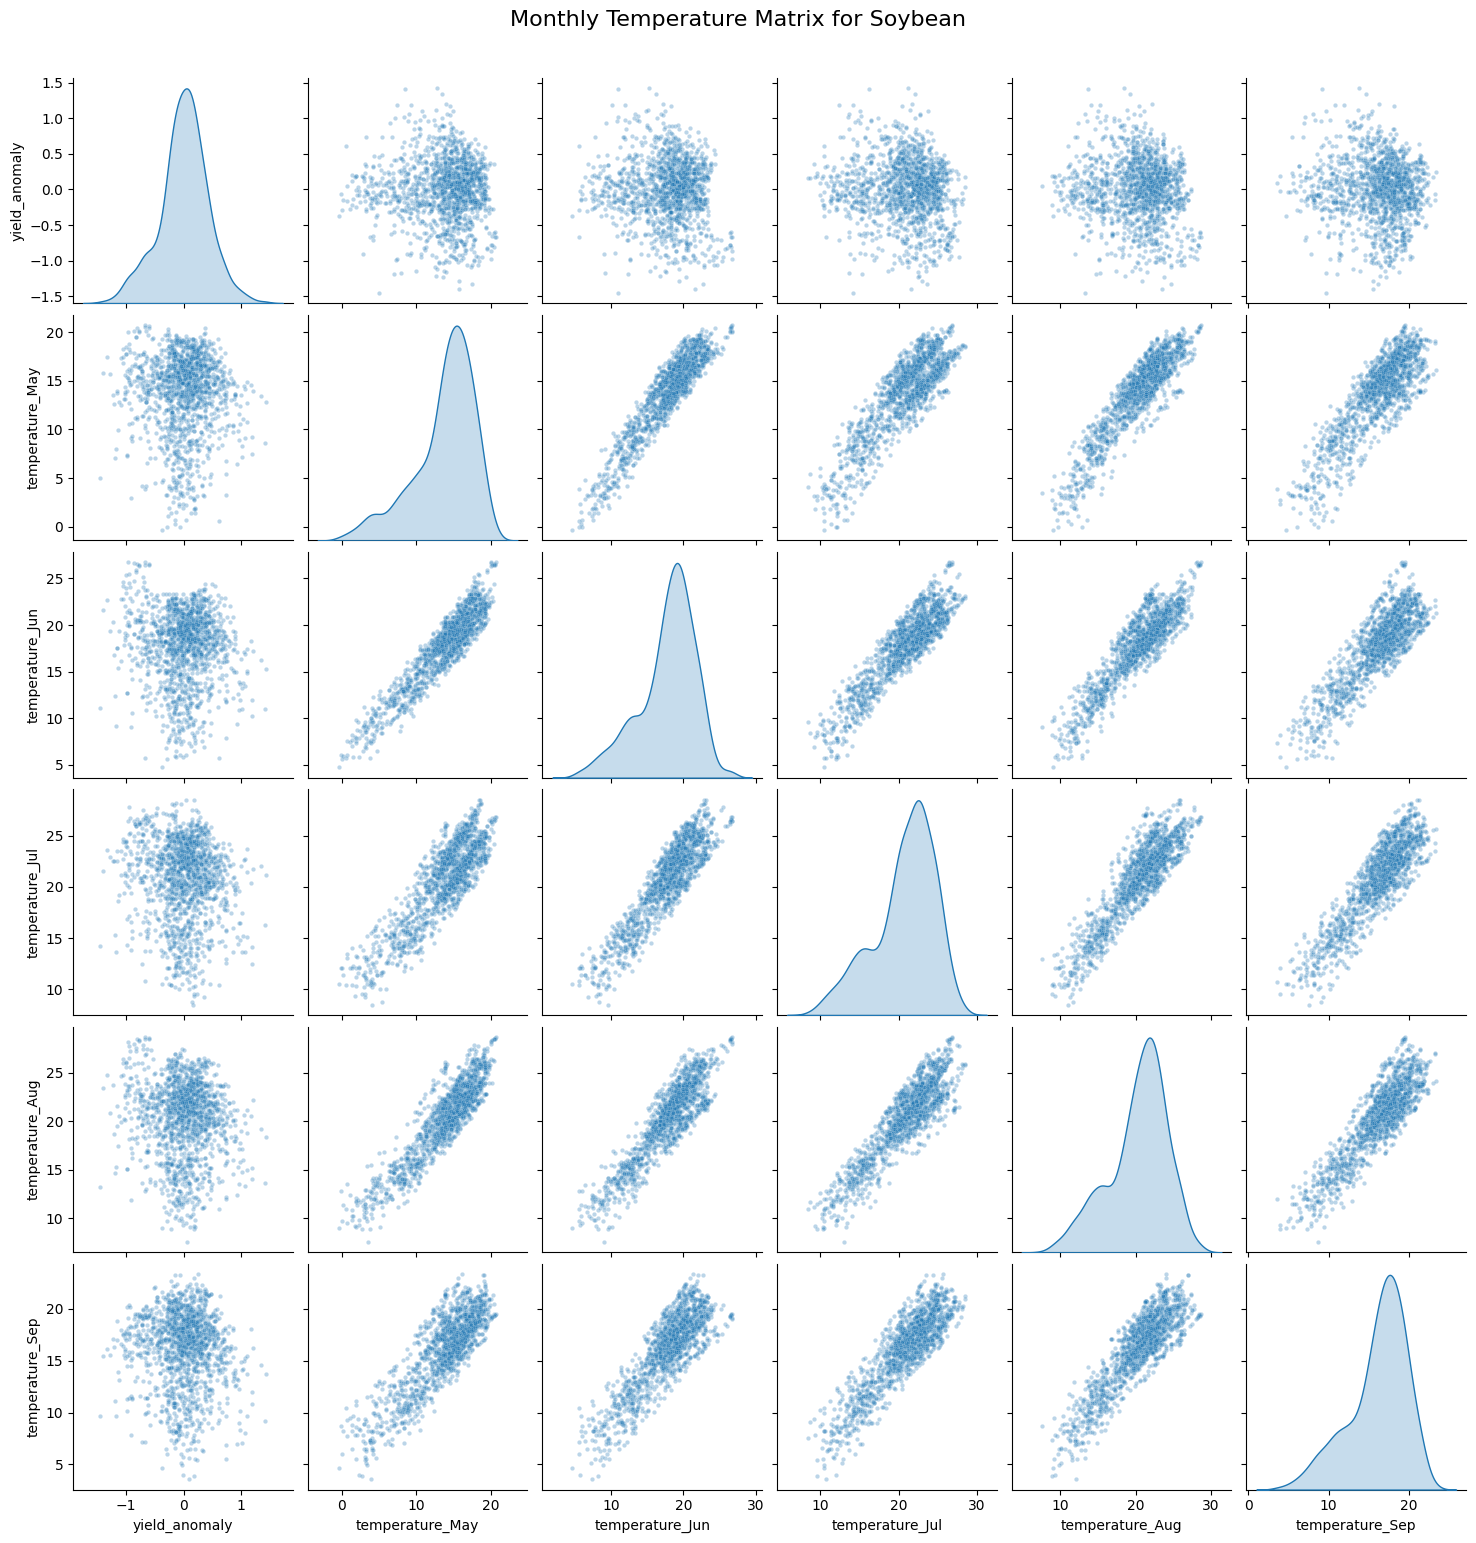


==================== Processing: WHEAT_SPRING ====================

Generating Summary Stressors Matrix...


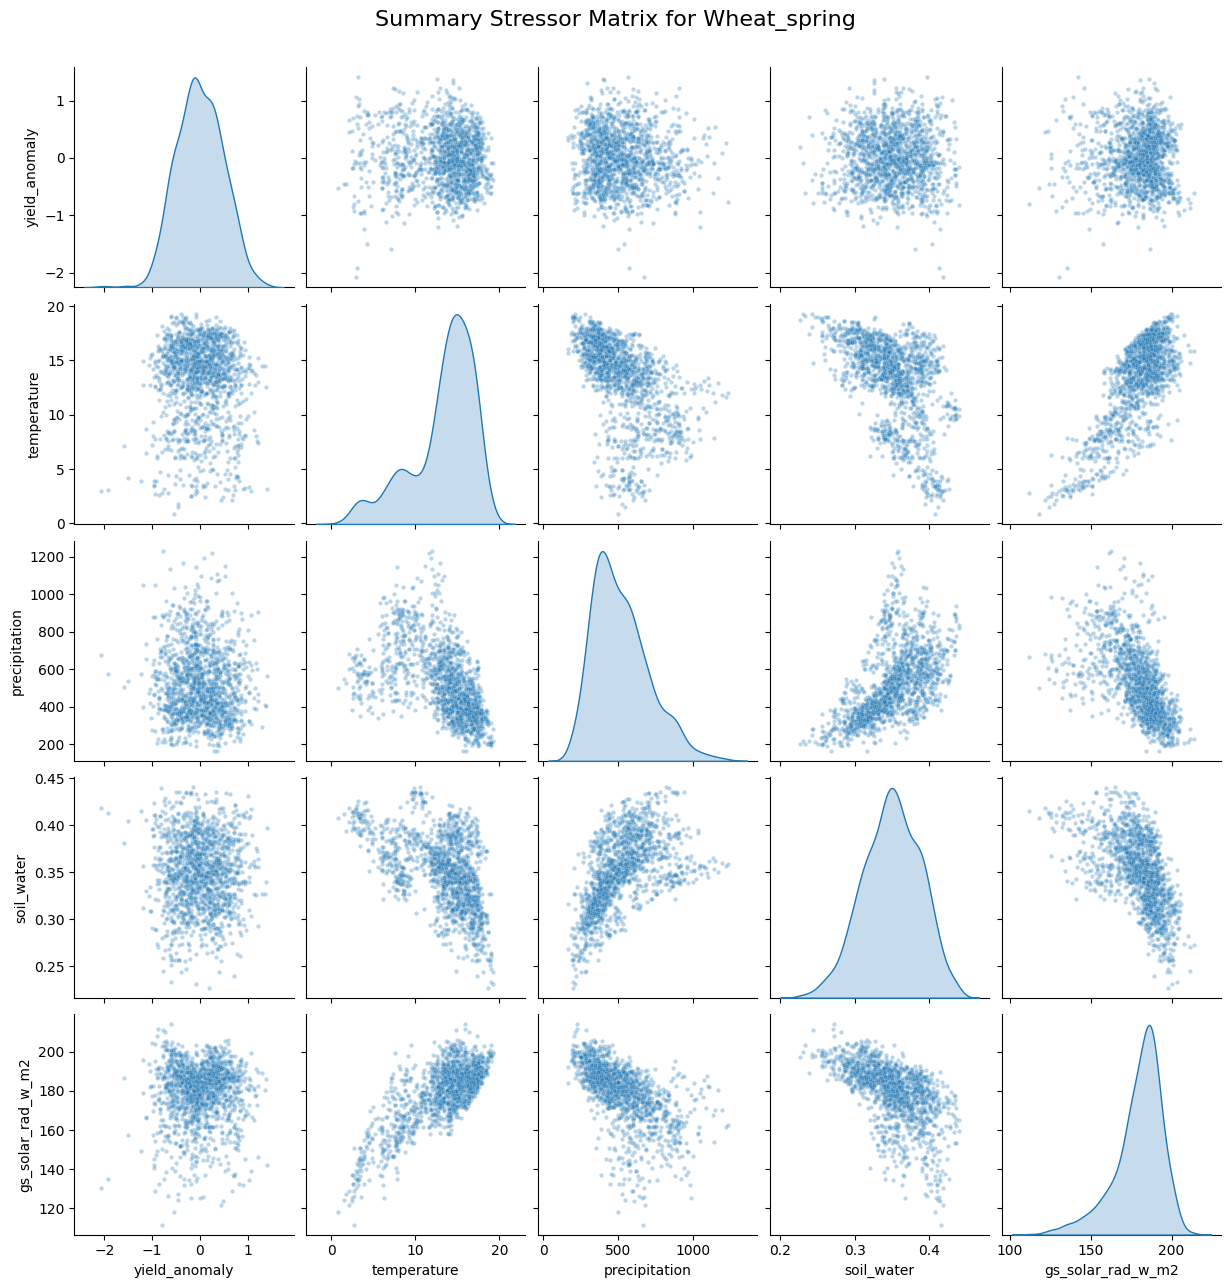


Generating Monthly Temperature Matrix...


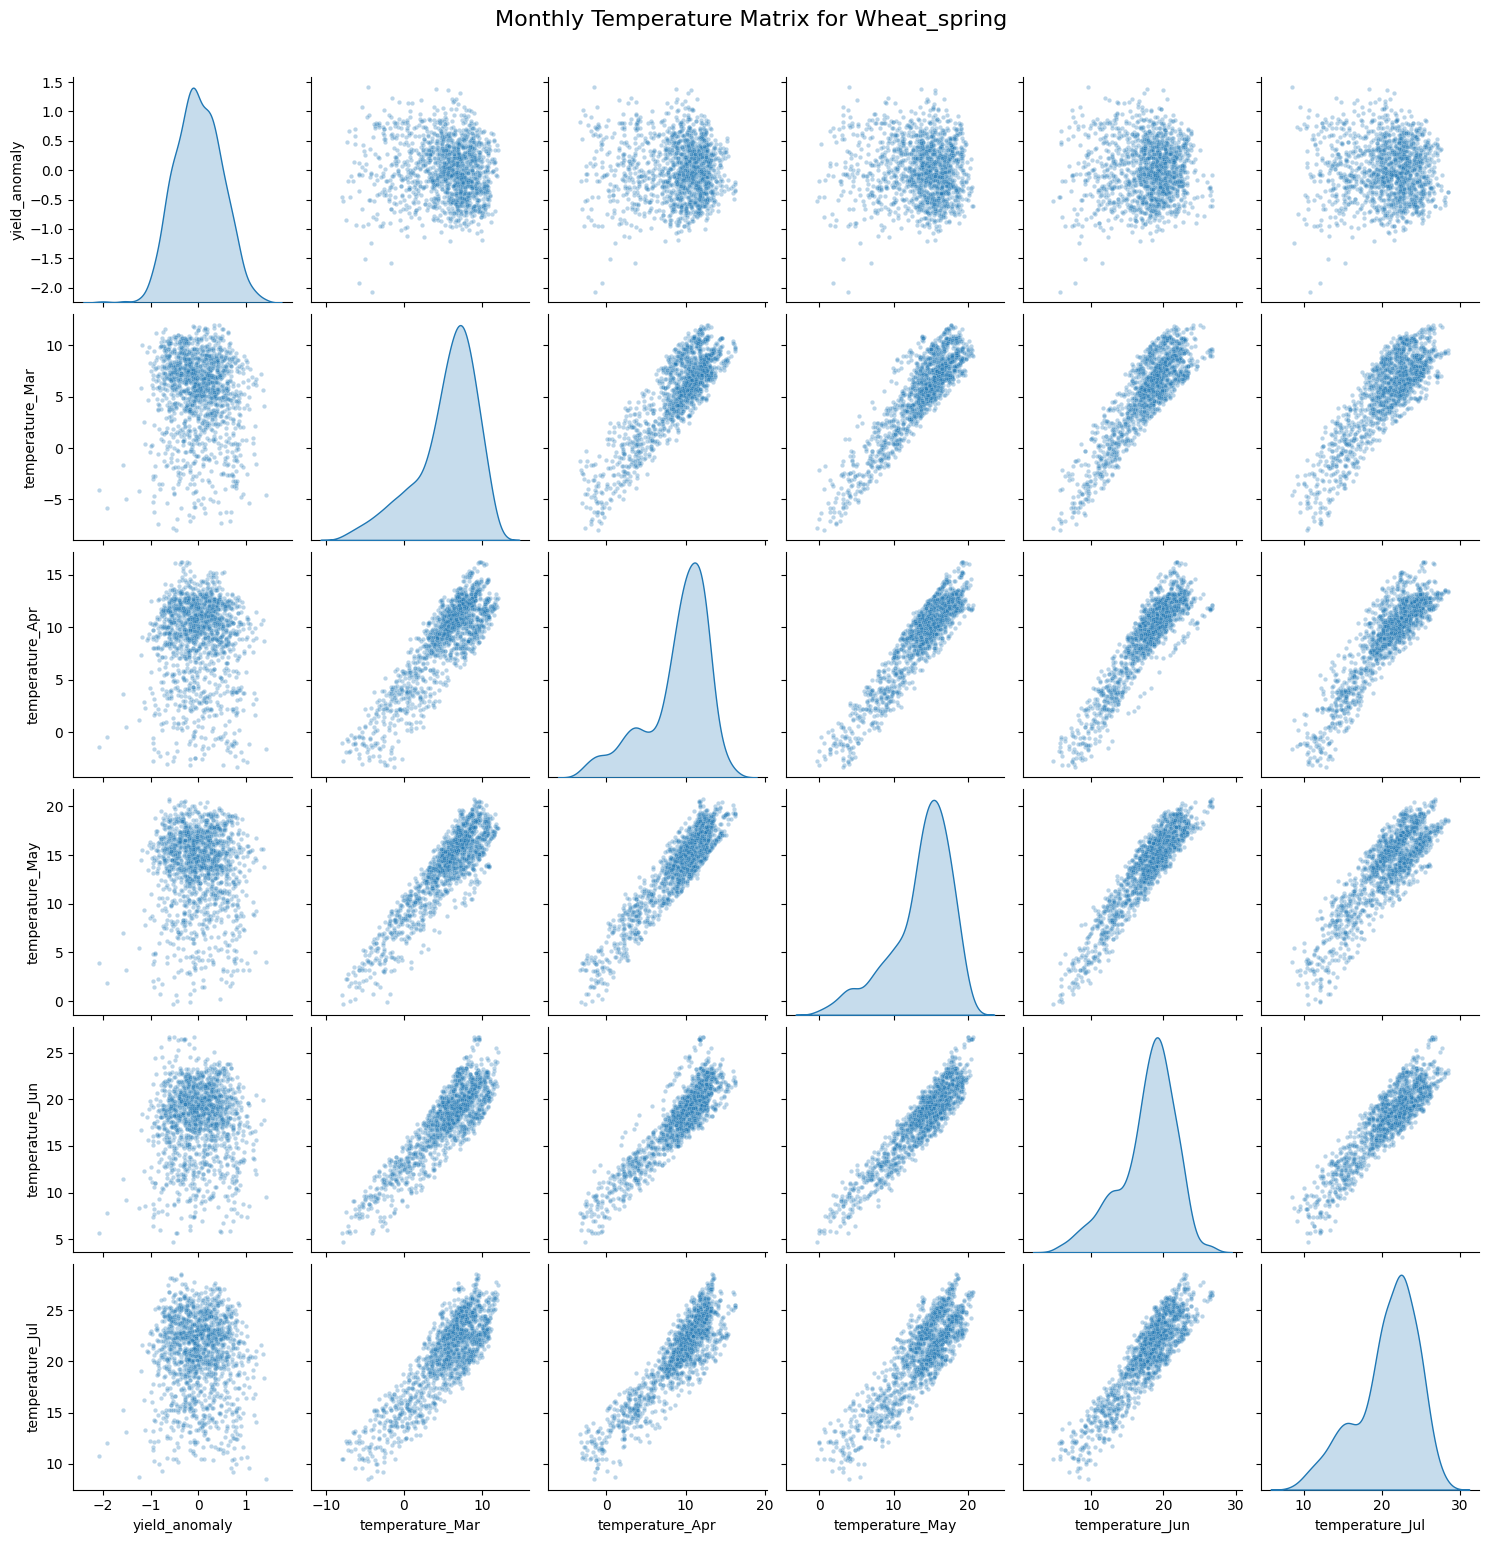


==================== Processing: WHEAT_WINTER ====================

Generating Summary Stressors Matrix...


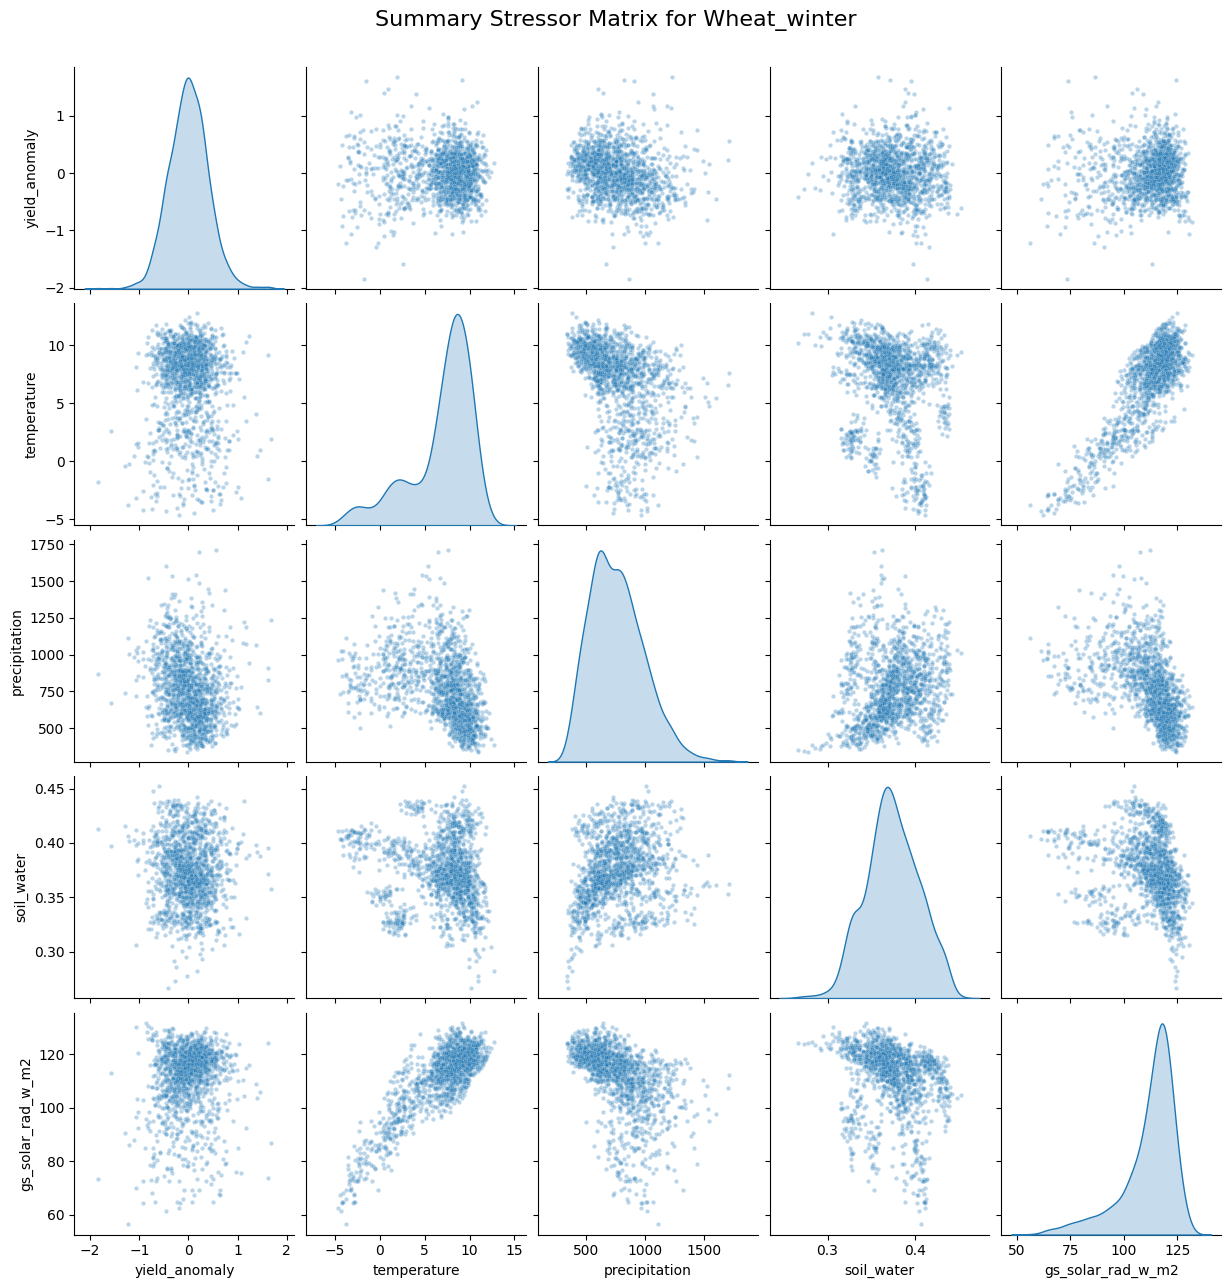


Generating Monthly Temperature Matrix...


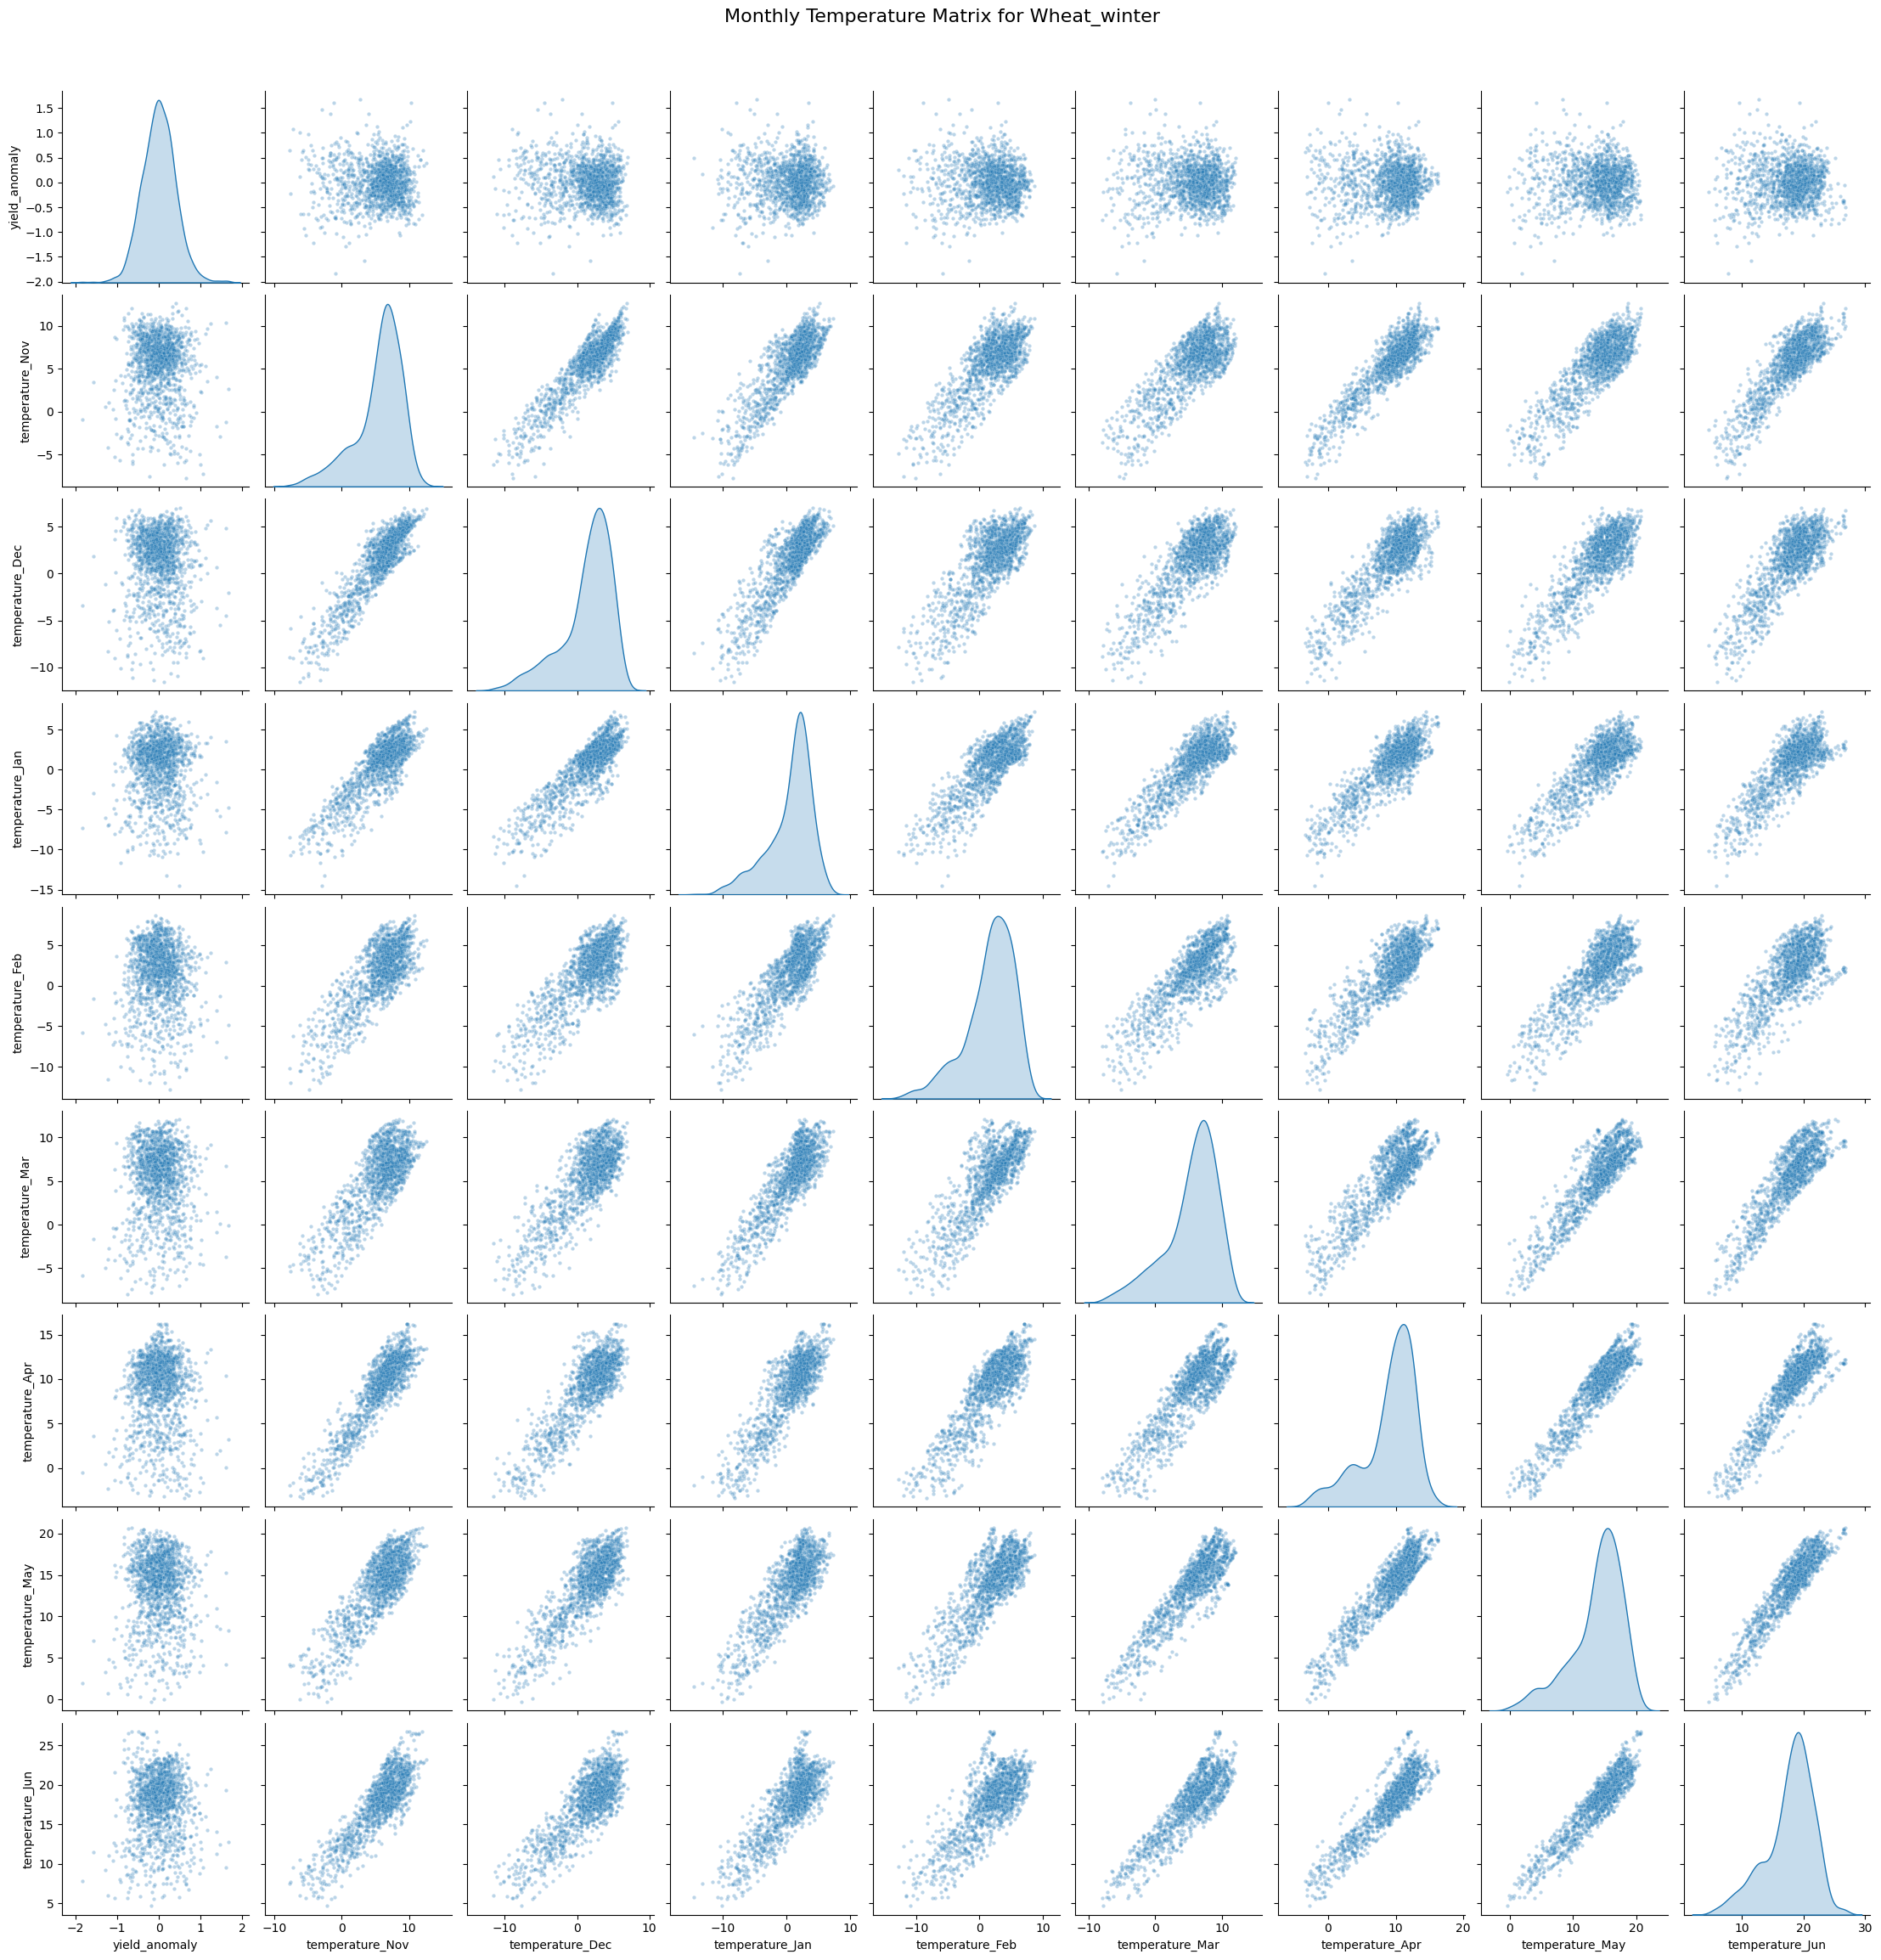


--- All scatterplot matrices generated. ---


In [ ]:
# Cell 1: Generate All Scatterplot Matrices
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuration ---
# List of the new feature-engineered dataset files
file_info = {
    'maize': {'path': '../data-cherry-pick/feature_engineered/maize_feature_engineered.csv'},
    'rice': {'path': '../data-cherry-pick/feature_engineered/rice_feature_engineered.csv'},
    'soybean': {'path': '../data-cherry-pick/feature_engineered/soybean_feature_engineered.csv'},
    'wheat_spring': {'path': '../data-cherry-pick/feature_engineered/wheat_spring_feature_engineered.csv'},
    'wheat_winter': {'path': '../data-cherry-pick/feature_engineered/wheat_winter_feature_engineered.csv'}
}

print("--- Generating Scatterplot Matrices for All Crops ---")

# --- Main Loop to Process Each Crop Dataset ---
for crop_name, info in file_info.items():
    print(f"\n{'='*20} Processing: {crop_name.upper()} {'='*20}")
    
    try:
        # 1. Load the data
        df = pd.read_csv(info['path'])
        
        # --- MATRIX 1: SUMMARY STRESSORS ---
        print("\nGenerating Summary Stressors Matrix...")
        summary_cols = [
            'yield_anomaly', 'temperature', 'precipitation', 
            'soil_water', 'gs_solar_rad_w_m2'
        ]
        
        g1 = sns.pairplot(
            df[summary_cols],
            kind='scatter',
            diag_kind='kde',
            plot_kws={'alpha': 0.3, 's': 10},
            diag_kws={'fill': True}
        )
        g1.fig.suptitle(f'Summary Stressor Matrix for {crop_name.capitalize()}', y=1.03, fontsize=16)
        plt.show()

        # --- MATRIX 2: MONTHLY TEMPERATURE DEEP DIVE ---
        print("\nGenerating Monthly Temperature Matrix...")
        monthly_temp_cols = [col for col in df.columns if 'temperature_' in col]
        
        # Check if there are any monthly temp columns before trying to plot
        if monthly_temp_cols:
            cols_for_monthly_matrix = ['yield_anomaly'] + monthly_temp_cols
            
            g2 = sns.pairplot(
                df[cols_for_monthly_matrix],
                kind='scatter',
                diag_kind='kde',
                plot_kws={'alpha': 0.3, 's': 10},
                diag_kws={'fill': True}
            )
            g2.fig.suptitle(f'Monthly Temperature Matrix for {crop_name.capitalize()}', y=1.03, fontsize=16)
            plt.show()
        else:
            print("No monthly temperature columns found for this crop.")

    except FileNotFoundError:
        print(f"ERROR: File not found: {info['path']}")
    except Exception as e:
        print(f"An error occurred while processing {crop_name}: {e}")

print("\n--- All scatterplot matrices generated. ---")

--- Loading and combining all crop datasets ---
Master DataFrame created with 5775 total rows.

--- Generating the final combined matrix ---


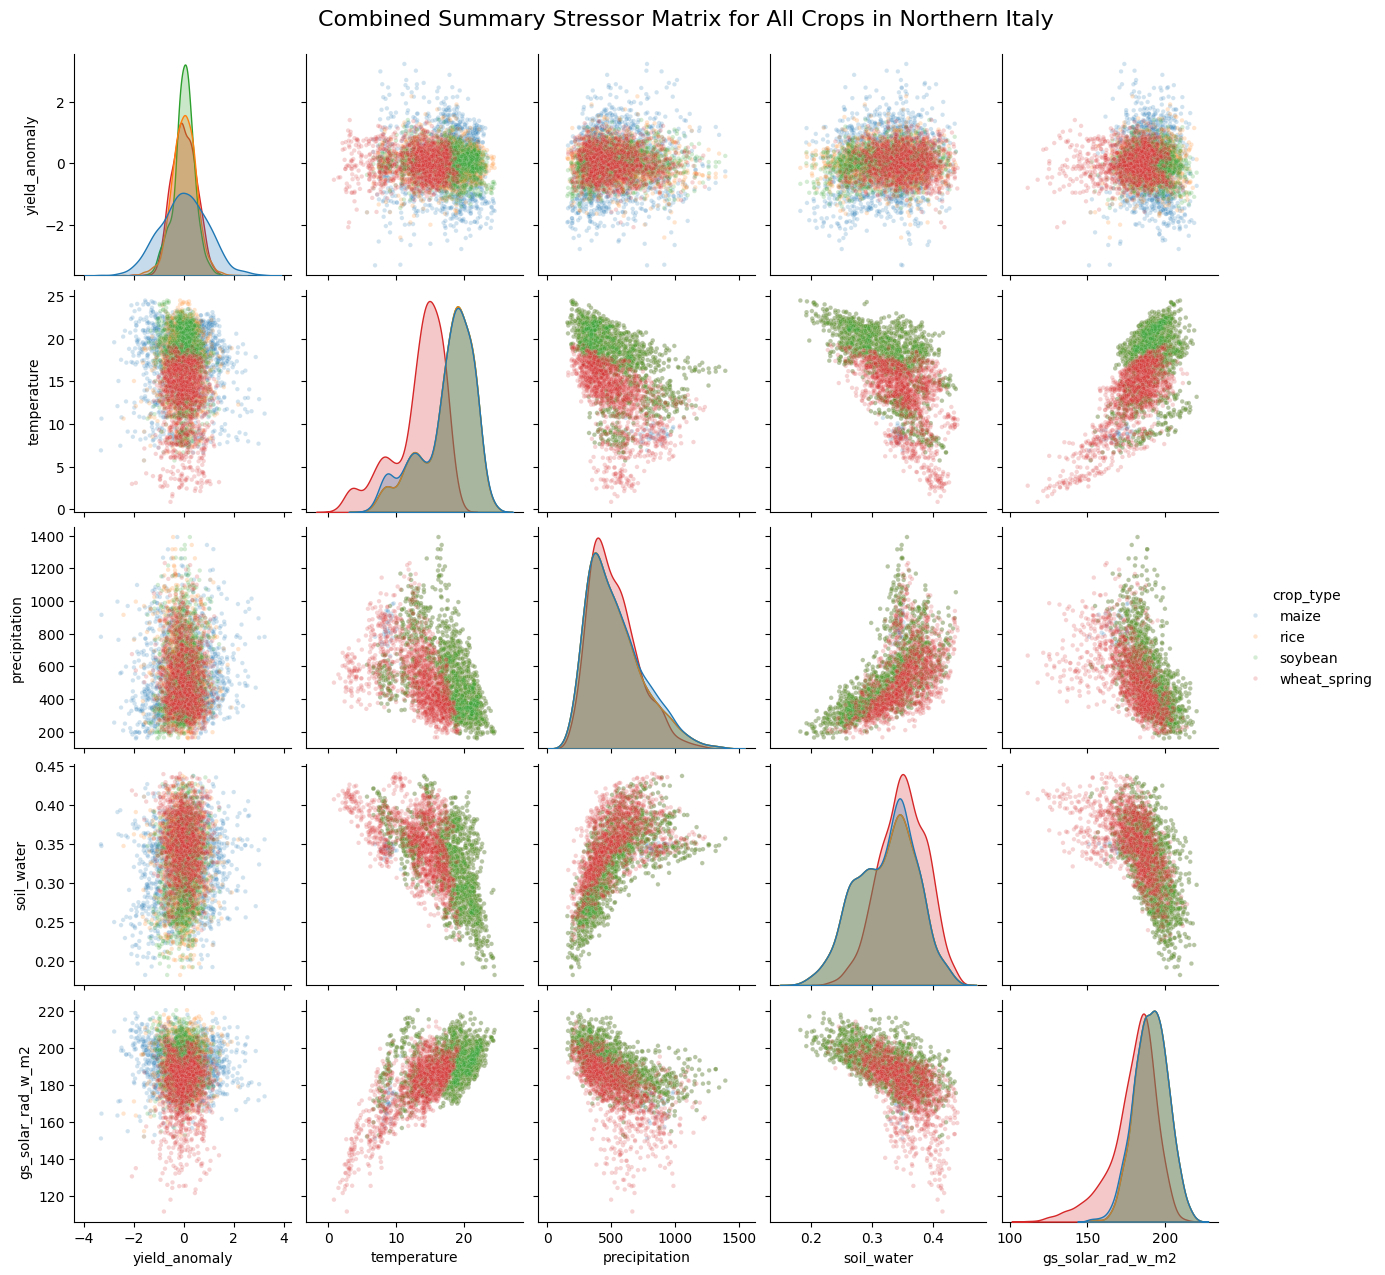

In [4]:
# Cell 2: Generate the Combined, Multi-Crop Scatterplot Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Load and Combine All Feature-Engineered Datasets ---
# This is the most important step. We will create one large DataFrame.

# List of the new feature-engineered dataset files
file_info = {
    'maize': {'path': '../data-cherry-pick/feature_engineered/maize_feature_engineered.csv', 'yield_col': 'yield_maize'},
    'rice': {'path': '../data-cherry-pick/feature_engineered/rice_feature_engineered.csv', 'yield_col': 'yield_rice'},
    'soybean': {'path': '../data-cherry-pick/feature_engineered/soybean_feature_engineered.csv', 'yield_col': 'yield_soybean'},
    'wheat_spring': {'path': '../data-cherry-pick/feature_engineered/wheat_spring_feature_engineered.csv', 'yield_col': 'yield_wheat_spring'},
    #'wheat_winter': {'path': '../data-cherry-pick/feature_engineered/wheat_winter_feature_engineered.csv', 'yield_col': 'yield_wheat_winter'}
}

all_dfs = []
print("--- Loading and combining all crop datasets ---")

for crop_name, info in file_info.items():
    try:
        df = pd.read_csv(info['path'])
        
        # Add a new column to identify the crop for each row
        df['crop_type'] = crop_name
        
        # Rename the specific yield column to a generic name for plotting
        df = df.rename(columns={info['yield_col']: 'yield_raw'})
        
        all_dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: File not found for {crop_name}. Skipping.")

# Concatenate all the individual DataFrames into one master DataFrame
master_df = pd.concat(all_dfs, ignore_index=True)
print(f"Master DataFrame created with {len(master_df)} total rows.")


# --- 2. Create the Combined Scatterplot Matrix ---
print("\n--- Generating the final combined matrix ---")

# Define the summary columns we want to plot
summary_cols = [
    'yield_anomaly', 'temperature', 'precipitation', 
    'soil_water', 'gs_solar_rad_w_m2'
]

# Create the pairplot, using the 'crop_type' column to color the points
g = sns.pairplot(
    master_df,
    vars=summary_cols, # The columns to plot
    hue='crop_type', # The column that determines the color
    kind='scatter',
    diag_kind='kde',
    plot_kws={'alpha': 0.2, 's': 10},
    diag_kws={'fill': True}
)

# Add regression lines to the scatter plots for clarity
#g.map_lower(sns.regplot, scatter_kws={'alpha': 0.0})
#g.map_upper(sns.regplot, scatter_kws={'alpha': 0.0})

# --- Formatting ---
g.fig.suptitle('Combined Summary Stressor Matrix for All Crops in Northern Italy', y=1.02, fontsize=16)
plt.show()

# If you don't want trendlines in the scatter plots, comment out the two g.map_lower and g.map_upper lines above.